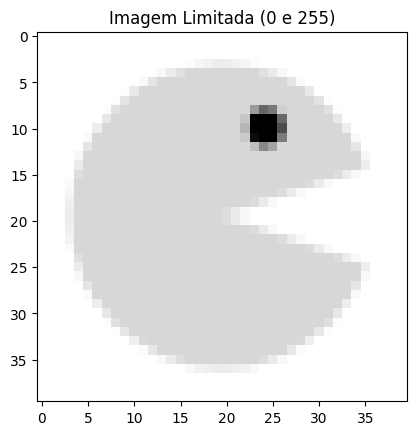

In [75]:
# Importação de Bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Caminho da Imagem
imagem_path = r"C:\Users\Rony Almendra\Documents\python\pacman\pacman\gg.png"


# Leitura da Imagem em Escala de Cinza
imagem_bw = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)

# Função para Limitar Valores
def limitar_valores(matriz, valor_maximo, valor_minimo):
    return np.clip(matriz, valor_minimo, valor_maximo)

# Aplicação da Função para Limitar Valores à Imagem em Escala de Cinza
imagem_bw_limitada = limitar_valores(imagem_bw, 255, 0)

# Visualização da Imagem Limitada
plt.imshow(imagem_bw_limitada, cmap='gray')
plt.title('Imagem Limitada (0 e 255)')
plt.show()

# Conversão da Imagem Limitada para uma Matriz NumPy
matriz = np.array(imagem_bw_limitada)

In [76]:
# Passo 1: Ordenar a matriz e transformar em uma lista
matriz_ordenada = np.sort(matriz.reshape(-1)).tolist()

# Passo 2: Encontrar a mediana
n = len(matriz_ordenada)
if n % 2 == 0:
    mediana = (matriz_ordenada[n//2 - 1] + matriz_ordenada[n//2]) / 2
else:
    mediana = matriz_ordenada[n//2]

# Passo 3: Dividir a matriz em três grupos
media_baixa = [x for x in matriz_ordenada if x < mediana]
media = [x for x in matriz_ordenada if x == mediana]
media_alta = [x for x in matriz_ordenada if x > mediana]

# Passo 4: Calcular a média de cada grupo
media_baixa_media = np.mean(media_baixa)
media_media = np.mean(media)
media_alta_media = np.mean(media_alta)

# Exibindo os resultados
print("Média Baixa Média:", media_baixa_media)
print("Média Média:", media_media)
print("Média Alta Média:", media_alta_media)

Média Baixa Média: 213.356783919598
Média Média: 248.0
Média Alta Média: 254.9033078880407


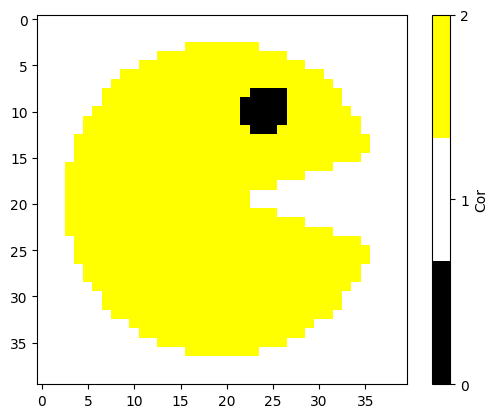

In [77]:
# Itera sobre os pixels da matriz e binariza a imagem (transforma em preto ou branco)
for i in range(40):
    for j in range(40):
        if(matriz[i, j] > media_alta_media):
            matriz[i, j] = 1
        elif(matriz[i, j] < media_alta_media and matriz[i, j] > media_baixa_media):
            matriz[i, j] = 2
        else:
            matriz[i, j] = 0

# Atribuindo cores            
cmap = plt.cm.colors.ListedColormap(['black', 'white', 'yellow'])

# Exibindo a matriz
plt.imshow(matriz, cmap=cmap)

# Exibindo a cor da barra de cores
plt.colorbar(ticks=[0, 1, 2], label='Cor')

In [78]:
def rastreio(x,y, matriz):
    matriz_copia = np.copy(matriz)
    for i in range(40):
        if i != y:
            matriz_copia[x, i] = 0;
        if i !=x:
            matriz_copia[i, y] = 0;
    if matriz[x,y] == 1:
        plt.title(f'a cor na cordenada x={x} e y={y} é branco') 
    elif matriz[x,y] == 2:
        plt.title(f'a cor na cordenada x={x} e y={y} é amarelo')
    elif matriz[x,y] == 0:
        plt.title(f'a cor na cordenada x={x} e y={y} é preto')
    plt.imshow(matriz_copia, cmap=cmap)
    plt.colorbar(ticks=[0, 1, 2], label='Cor')
    
    plt.show()
        
        

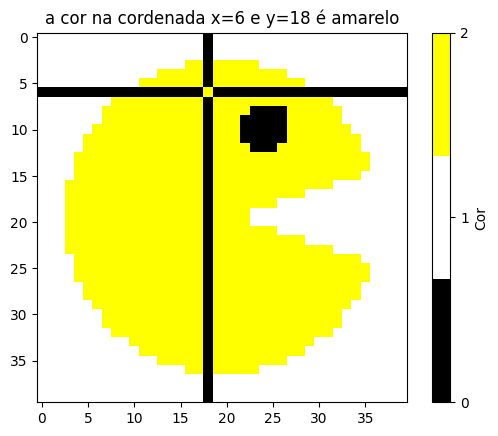

In [79]:
rastreio(6,18,matriz)

In [80]:
df = pd.DataFrame(matriz)
df.to_csv("dados.csv")

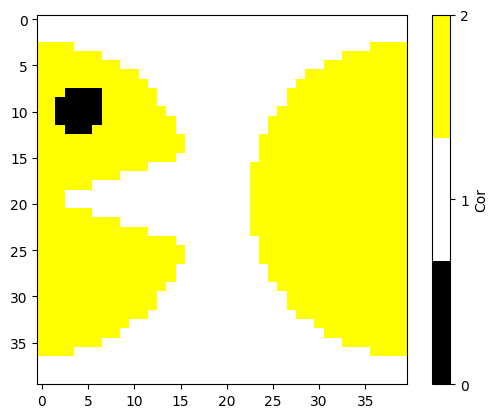

In [81]:
# Função para deslocamento no tempo
def deslocamento_tempo(matriz, deslocamento):
    # Criando uma matriz vazia com as mesmas dimensões que a matriz original
    nova_matriz = np.zeros_like(matriz)  # Nova matriz para armazenar o resultado do deslocamento
    
    # Iteração sobre cada elemento da matriz original
    for i in range(matriz.shape[0]):  # Loop pelas linhas da matriz
        for j in range(matriz.shape[1]):  # Loop pelas colunas da matriz
            # Calculando o novo índice da coluna após o deslocamento
            nova_coluna = (j - deslocamento) % matriz.shape[1]  
            """
            Explicação do cálculo do novo índice da coluna:
            (j - deslocamento): Subtrai o valor de deslocamento do índice atual da coluna.
            % matriz.shape[1]: Usamos o operador % (módulo) para garantir que o índice resultante esteja dentro dos limites da matriz. 
                                Isso é necessário caso o deslocamento seja maior que o tamanho da matriz.
            """
            # Atribuindo o valor do elemento na nova posição da matriz deslocada
            nova_matriz[i, nova_coluna] = matriz[i, j]
    
    # Retornando a matriz deslocada
    return nova_matriz

# Deslocamento no tempo 
deslocamento = 20 # Valor do deslocamento negativo ou positivo
matriz_deslocada = deslocamento_tempo(matriz, deslocamento)


# Exibindo o Pacman deslocado no tempo
plt.figure()
plt.imshow(matriz_deslocada, cmap=cmap)
plt.colorbar(ticks=[0, 1, 2], label='Cor')
plt.show()


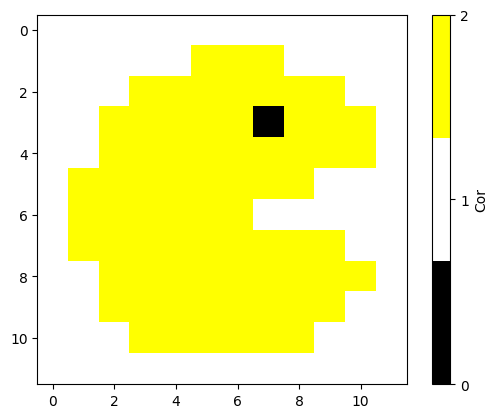

In [82]:
# Definição da função para escalonamento
def escalar_matriz(matriz, fator_escalonamento):
    # Obtendo as dimensões da matriz original
    linhas, colunas = matriz.shape
    
    # Calculando as novas dimensões da matriz escalonada
    nova_linhas = int(linhas * fator_escalonamento)
    nova_colunas = int(colunas * fator_escalonamento)
    
    # Inicializando a matriz escalonada com zeros
    matriz_escalada = np.zeros((nova_linhas, nova_colunas), dtype=matriz.dtype)
    
    # Iterando sobre cada posição na matriz escalonada
    for i in range(nova_linhas):
        for j in range(nova_colunas):
            # Calculando a posição correspondente na matriz original
            x_original = i / fator_escalonamento
            y_original = j / fator_escalonamento
            
            # Arredondando para o índice mais próximo na matriz original
            x_rounded = round(x_original)
            y_rounded = round(y_original)
            
            # Verificando se o índice está dentro dos limites da matriz original
            if 0 <= x_rounded < linhas and 0 <= y_rounded < colunas:
                # Atribuindo o valor da matriz original à posição na matriz escalonada
                matriz_escalada[i, j] = matriz[x_rounded, y_rounded]
    
    # Retornando a matriz escalonada
    return matriz_escalada

# Fator de escalonamento desejado
fator_escalonamento = 0.3  # altero o valor que deseja aumentar ou diminuir de 0.2 a ...

# Aplicando o escalonamento na matriz binarizada
matriz_escalada = escalar_matriz(matriz, fator_escalonamento)

# Atribuindo cores
cmap = plt.cm.colors.ListedColormap(['black', 'white', 'yellow'])

# Exibindo a matriz escalonada
plt.imshow(matriz_escalada, cmap=cmap)

# Exibindo a cor da barra de cores
plt.colorbar(ticks=[0, 1, 2], label='Cor')

# Exibindo a imagem
plt.show()


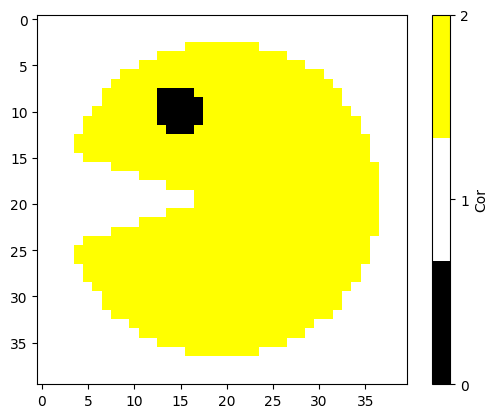

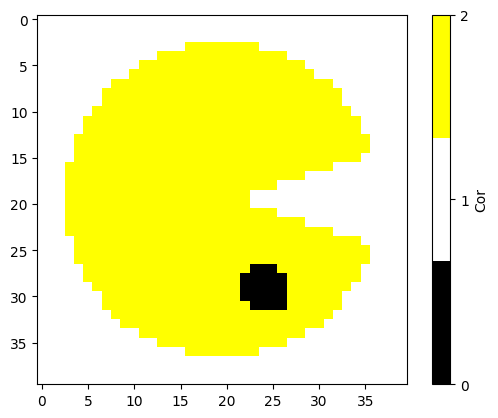

In [83]:
def reverter_pacman(matriz):
    # Inverte a ordem das colunas na matriz da imagem
    # Essa função reverter_pacman recebe a matriz que representa a imagem do Pacman. 
    # Dentro da função, nós invertemos a ordem das colunas na matriz usando a expressão matriz[:, ::-1]. 
    # Isso significa que pegamos todas as linhas da matriz (:) e invertemos a ordem das colunas (::-1).
    # Isso resulta na imagem do Pacman invertida horizontalmente. Em seguida, podemos usar essa função para exibir o Pacman invertido horizontalmente.
    matriz_revertida = matriz[:, ::-1]
    return matriz_revertida

# Revertendo a imagem do Pacman
matriz_revertida = reverter_pacman(matriz)

# Exibindo a imagem revertida
plt.imshow(matriz_revertida, cmap=cmap)
plt.colorbar(ticks=[0, 1, 2], label='Cor')
plt.show()

def reverter_pacman_vertical(matriz):
    # Inverte a ordem das linhas na matriz da imagem
    matriz_revertida = matriz[::-1, :]
    return matriz_revertida


# Revertendo a imagem do Pacman
matriz_revertida_vertical = reverter_pacman_vertical(matriz)

# Exibindo a imagem revertida
plt.imshow(matriz_revertida_vertical, cmap=cmap)
plt.colorbar(ticks=[0, 1, 2], label='Cor')
plt.show()

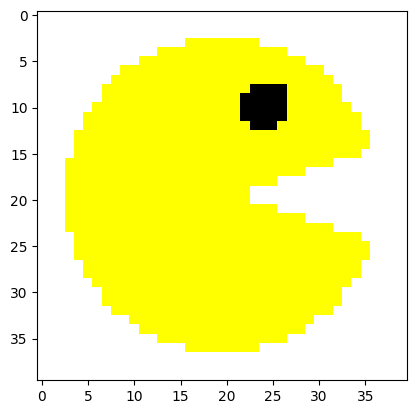

In [84]:
import matplotlib.animation as animation

def animacao_completa_loop_continuo(matriz, deslocamentos_frente, fator_minimo, fator_maximo):
  """
  Função que gera uma animação completa do Pacman com movimento, 
  crescimento/diminuicao, reversão horizontal e vertical em tempo real.

  Args:
      matriz: A matriz binarizada do Pacman.
      deslocamentos_frente: Uma lista com os valores de deslocamento 
                            para o movimento para frente.
      fator_minimo: O fator de escalonamento mínimo.
      fator_maximo: O fator de escalonamento máximo.

  Returns:
      Uma função para gerar a animação.
  """

  # Figura para a exibição da imagem
  fig = plt.figure()
  plt.imshow(matriz, cmap=cmap)

  # Índice do deslocamento atual
  i = 0

  # Função para atualizar a imagem a cada frame
  def update_frame(i):
    # Deslocamento para frente
    deslocada_frente = deslocamento_tempo(matriz.copy(), deslocamentos_frente[i])

    # Fator de escalonamento atual
    fator_atual = fator_minimo + (fator_maximo - fator_minimo) * (i / len(deslocamentos_frente))

    # Escalonamento
    escalada = escalar_matriz(deslocada_frente, fator_atual)

    # Reversão horizontal
    revertida_horizontal = reverter_pacman(escalada)

    # Reversão vertical
    revertida_vertical = reverter_pacman_vertical(revertida_horizontal)

    # Atualização da imagem
    plt.imshow(revertida_vertical, cmap=cmap)

  # Animação
  ani = animation.FuncAnimation(fig, update_frame, interval=50, frames=len(deslocamentos_frente))


  # Exibindo a animação
  plt.show()

# Exemplo de uso da função
deslocamentos_frente = [1, 5, 10]  # Exemplo de movimentos para frente
fator_minimo = 0.3
fator_maximo = 5.0

animacao_completa_loop_continuo(matriz.copy(), deslocamentos_frente, fator_minimo, fator_maximo)
